In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터셋 정보
https://grouplens.org/datasets/movielens/
#### rating
- user_id
- movie_id
- rating
- time

#### movie
- movie_id
- title
- genre

#### user
- user_id
- gender
- age
- occuption(개인정보-직업)
- zipcode(개인정보-주소)

#### etc
- 구분자 : "::"

### 데이터 로딩

In [2]:
rating_data = pd.io.parsers.read_csv('../data/ml-1m/ratings.dat',
                                     names=['user_id', 'movie_id', 'rating', 
                                            'time'],
                                     delimiter='::')
movie_data = pd.io.parsers.read_csv('../data/ml-1m/movies.dat',
                                     names=['movie_id', 'title', 'genre'],
                                     delimiter='::')
user_data = pd.io.parsers.read_csv('../data/ml-1m/users.dat',
                                     names=['user_id', 'gender', 'age',
                                            'occuption', 'zipcode'],
                                     delimiter='::')

In [3]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
user_data.head()

,user_id,gender,age,occuption,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id      6040 non-null int64
gender       6040 non-null object
age          6040 non-null int64
occuption    6040 non-null int64
zipcode      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [8]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
rating_data.isnull().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [10]:
user_data.isnull().sum()

user_id      0
gender       0
age          0
occuption    0
zipcode      0
dtype: int64

In [11]:
movie_data.isnull().sum()

movie_id    0
title       0
genre       0
dtype: int64

### 탐색적 데이터 분석

In [12]:
# 총 영화의 개수
len(movie_data['movie_id'].unique())

3883

In [13]:
# 연도별 영화의 개수를 이용해서 가장 많은 영화가 출시된 연도 top 10
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])

# 개별 요소의 건수 value_counts()
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [14]:
# 연대별 영화의 개수 추출
# 1900, 1910, 1920...
# 파생변수 : movie_term
# movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-2]+'0')
movie_data['year_term'] = movie_data['year'].apply(lambda x:x[:3]+'0')

In [15]:
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

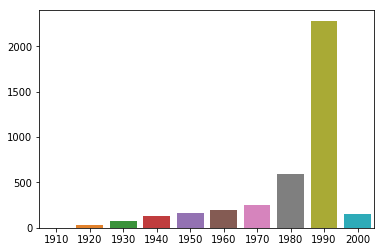

In [16]:
sns.barplot(movie_year_term.index, movie_year_term.values)
plt.show()

In [17]:
# 영화데이터에서 가장 많이 등장하는 장르는 무엇일까?
# 구분자 | ex) 코미디|드라마|액션
# dict => key:value
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    # genre 피처의 구분자를 분리
    genre_combination = row['genre']
    p = genre_combination.split('|')
    
    for genre in p:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

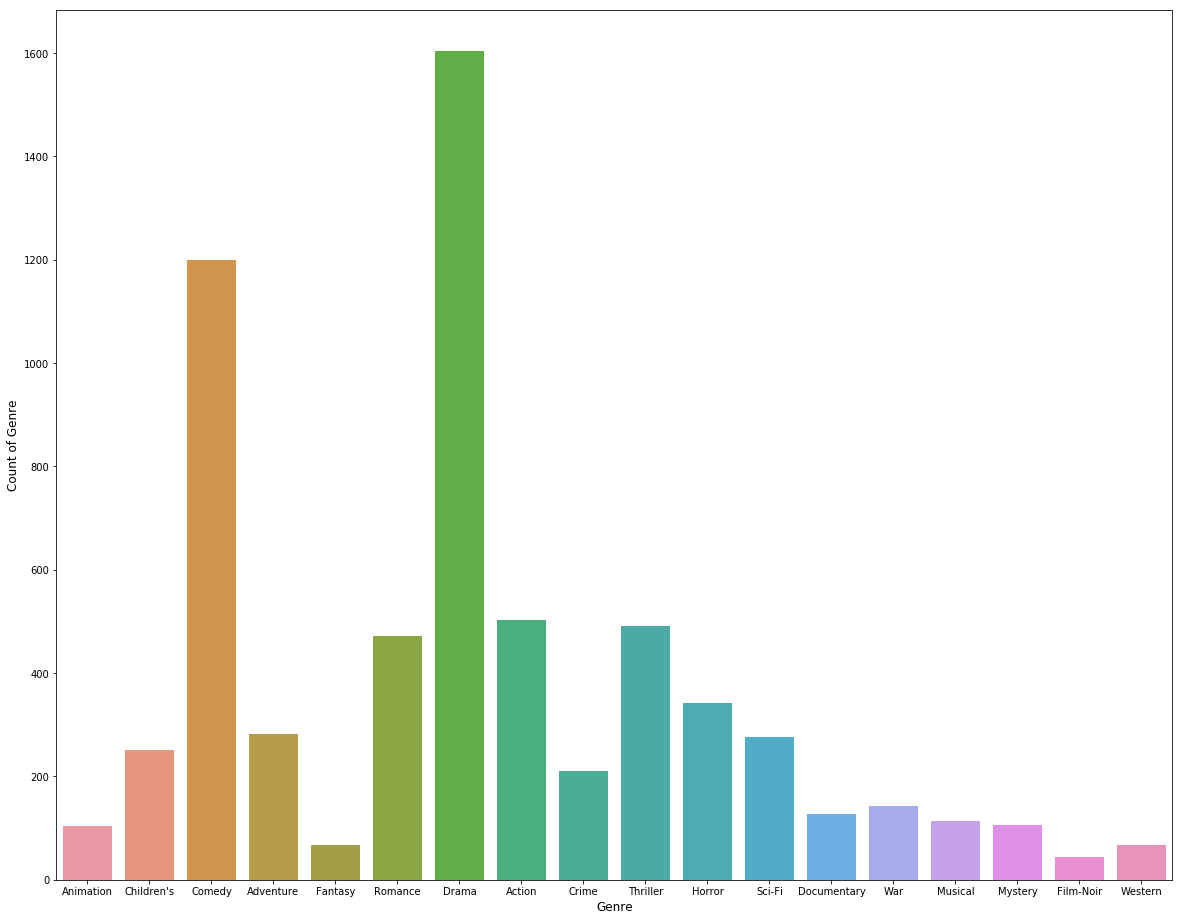

In [18]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()))
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Genre', fontsize=12)
plt.show()

In [19]:
# 사용자의 성별과 사용자의 연령대
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

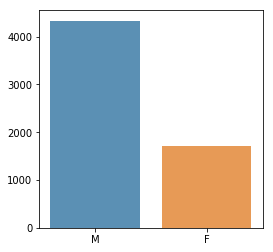

In [20]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.show()

In [21]:
# user의 나이를 연령대로 묶는 작업
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0]+'0'
    
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

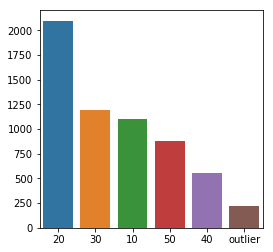

In [22]:
sns.barplot(user_ages.index, user_ages.values)
plt.show()

In [23]:
# 사용자의 수
len(user_data['user_id'].unique())

6040

In [24]:
# 각 영화의 평점 횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count()
movie_rate_count.head()

movie_id
1    2077
2     701
3     478
4     170
5     296
Name: rating, dtype: int64

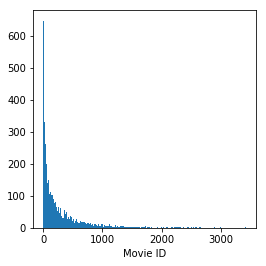

In [25]:
fig = plt.hist(movie_rate_count.values, bins=200)
plt.xlabel('Movie ID')
plt.show()

In [26]:
print('총 영화수 :', len(movie_data['movie_id'].unique()))

총 영화수 : 3883


In [27]:
print('100개 미만의 평가를 받은 영화 수 :', 
      len(movie_rate_count[movie_rate_count < 100]))

100개 미만의 평가를 받은 영화 수 : 1687


In [28]:
# 각 영화의 평균 평점
# 각 영화 당 평점 건수와 평균 값 추출
movie_groupby_rating_info = rating_data.groupby('movie_id')['rating'].agg(
    {'rated_count' : 'count', 'rated_mean' : 'mean'})
movie_groupby_rating_info.head()

,rated_count,rated_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


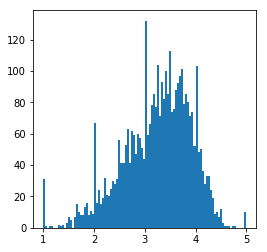

In [29]:
movie_groupby_rating_info['rated_mean'].hist(bins=100, grid=False)

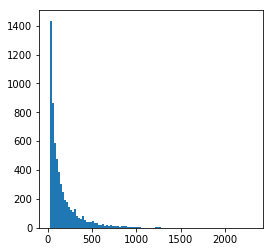

In [30]:
# 유저별로 평가한 영화 개수
user_rate_info = rating_data.groupby('user_id')['rating'].agg({
    'rated_count':'count', 'rated_mean':'mean', 'rated_std':'std'})
user_rate_info['rated_count'].hist(bins=100, grid=False)
plt.show()

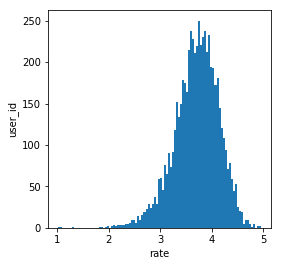

In [31]:
# 유저별로 평가한 평균 영화의 평점
user_rate_info['rated_mean'].hist(bins=100, grid=False)
plt.xlabel('rate')
plt.ylabel('user_id')
plt.show()

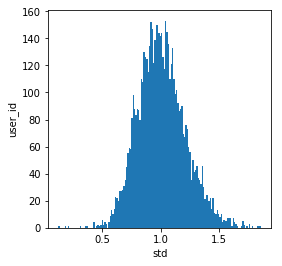

In [32]:
# 유저별로 평가한 영화 점수의 편차(표준 편차)
user_rate_info['rated_std'].hist(bins=150, grid=False)
plt.xlabel('std')
plt.ylabel('user_id')
plt.show()

In [33]:
# 100번 이상 평가받은 영화 중 평균 평점이 높은 Top10의 영화 출력
merged_data = movie_groupby_rating_info.merge(movie_data, on=['movie_id'], 
                                              how='left')
merged_data.head()

,movie_id,rated_count,rated_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990


In [34]:
merged_data[merged_data['rated_count'] > 100][
    ['title', 'rated_mean']].nlargest(10, 'rated_mean')

,title,rated_mean
1839,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510
309,"Shawshank Redemption, The (1994)",4.554558
802,"Godfather, The (1972)",4.524966
708,"Close Shave, A (1995)",4.520548
49,"Usual Suspects, The (1995)",4.517106
513,Schindler's List (1993),4.510417
1066,"Wrong Trousers, The (1993)",4.507937
861,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489
1108,Raiders of the Lost Ark (1981),4.477725
843,Rear Window (1954),4.476190


### 영화 평점 예측 - 추천 시스템 알고리즘
- 이미지, 영상 인식
- 소리인식
- 사기방지
- 이상감지
- 침임탐지
- 환자진단
- 수요 예측
- 추천 시스템 : CF(협업 필터링, 상품기반), CB(내용 기반), KB(지식 기반)

In [35]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [36]:
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

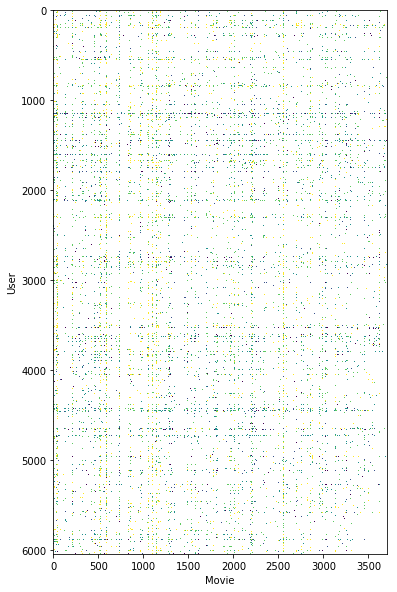

In [37]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.show()

빈 곳은 결측값 -> 알고리즘을 이용해 처리

### SVD를 활용한 추천 시스템

In [50]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

np.set_printoptions(suppress=True) # 부동소수점

reader = Reader(rating_scale=(1, 5))

In [51]:
rating_dict = {'item_id':[1,2,3,1,2,3,2],
               'user_id':['a','a','a','b','b','b','c'],
               'rating':[2, 4, 4, 2, 5, 4, 5]}
df = pd.DataFrame(rating_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [52]:
df_matrix_table = df[['user_id', 'item_id', 'rating']].set_index(['user_id','item_id']).unstack()
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          NaN  5.0  NaN

In [53]:
# SVD 사용을 위한 데이터셋을 생성
data = Dataset.load_from_df(df=df[['user_id', 'item_id', 'rating']],
                            reader=reader)
train_data = data.build_full_trainset()

In [54]:
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)
model.fit(train_data)

In [ ]:
# build_anti_testset()
# 학습에 사용된 matrix에 0으로 평가되어있는 부분의 데이터
# user 혹은 item

test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

In [ ]:
# fit - 모델생성, 예측 : predict(), test()

In [55]:
# 학습데이터
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)

train_data = data.build_full_trainset()

In [56]:
import time
# SVD 모델 학습
train_start = time.time()
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)

model.fit(train_data)
train_end = time.time()
train_end - train_start

82.20847463607788

In [57]:
# 영화의 평점을 예측할 타겟이 되는 유저
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [58]:
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [60]:
# 4번 유저가 보지 않은 영화들 중 평점이 높은 영화 10개 추출
test_data = []

for index,row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

In [61]:
# 타겟 유저(4번)의 평점 점수를 예측
target_user_predictions = model.test(test_data)

In [64]:
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions,
                                                            user_id=target_user_id,
                                                            user_history=target_user_movie_rating_dict)

In [66]:
import operator
# target_user_movie_predict_dict 예측된 점수를 이용해서 타겟 유저에 맞는 Top10
target_user_top10_predicted = sorted(
    target_user_movie_predict_dict.items(),
    key=operator.itemgetter(1),reverse=True)[:10]

In [67]:
target_user_top10_predicted

[(246, 5),
 (262, 5),
 (326, 5),
 (527, 5),
 (602, 5),
 (608, 5),
 (615, 5),
 (669, 5),
 (670, 5),
 (750, 5)]

In [69]:
# 타이틀 정보를 포함해서 출력
movie_dict = {}

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title
    
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Hoop Dreams (1994) : 5
Little Princess, A (1995) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Great Day in Harlem, A (1994) : 5
Fargo (1996) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Aparajito (1956) : 5
World of Apu, The (Apur Sansar) (1959) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5


### 예측모델의 평가
- RMSE

In [72]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)

train_data, test_data = train_test_split(data, test_size=.2)

# SVD 모델 학습
train_start = time.time()
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)

model.fit(train_data)
train_end = time.time()
print(f'training time of model : {train_end - train_start:.2f} second')

# 예측
predictions = model.test(test_data)

# 테스트 데이터의 RMSE 출력
print('- RMSE of test dataset using SVD model -')
accuracy.rmse(predictions)

training time of model : 77.12 second
- RMSE of test dataset using SVD model -
RMSE: 0.8621


0.8621256920234865

RMSC 평가는 예측값과 실제 값의 차이의 합을 나타내는 수치이기 때문에 작을 수록 좋은 모델

### 하이퍼 파라미터 튜닝

In [73]:
rmse_list_by_factors = []
ttime_list_by_factors = []

for n in range(1, 15):
    train_start = time.time()
    model = SVD(n_factors=n, lr_all=0.005, reg_all=0.02, n_epochs=100)
    model.fit(train_data)
    train_end = time.time()
    print(f'training time of model : {train_end - train_start:.2f} second')
    print('RMSE of test dataset in SVD model.n_factors =', n)
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append(train_end - train_start)
    print('-------------------------------------')
    
print('searching n_factors is finised')

training time of model : 66.04 second
RMSE of test dataset in SVD model.n_factors = 1
RMSE: 0.8837
-------------------------------------
training time of model : 66.51 second
RMSE of test dataset in SVD model.n_factors = 2
RMSE: 0.8740
-------------------------------------
training time of model : 67.86 second
RMSE of test dataset in SVD model.n_factors = 3
RMSE: 0.8687
-------------------------------------
training time of model : 68.86 second
RMSE of test dataset in SVD model.n_factors = 4
RMSE: 0.8677
-------------------------------------
training time of model : 70.91 second
RMSE of test dataset in SVD model.n_factors = 5
RMSE: 0.8612
-------------------------------------
training time of model : 72.50 second
RMSE of test dataset in SVD model.n_factors = 6
RMSE: 0.8632
-------------------------------------
training time of model : 75.71 second
RMSE of test dataset in SVD model.n_factors = 7
RMSE: 0.8630
-------------------------------------
training time of model : 81.75 second
RMS

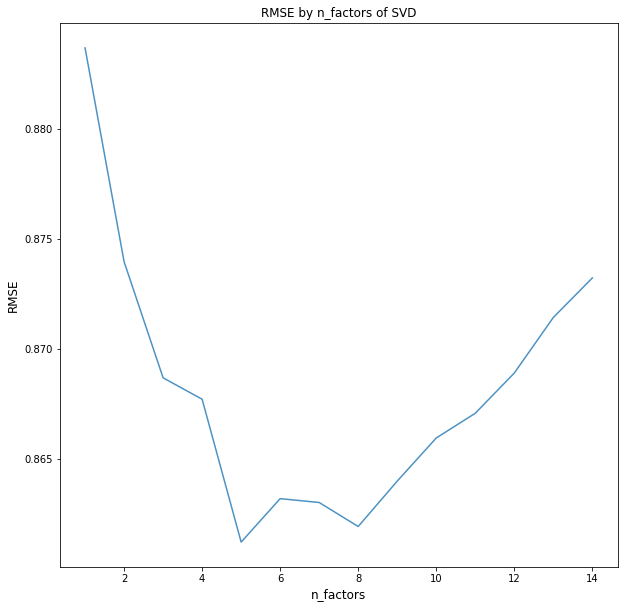

In [74]:
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

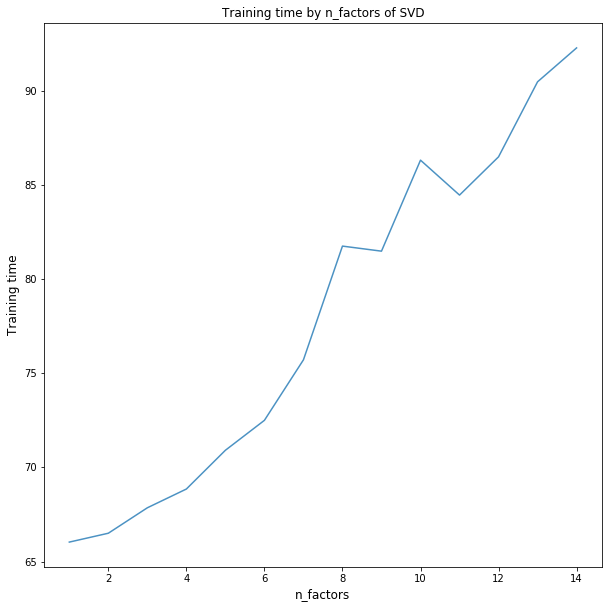

In [75]:
plt.plot(range(1, 15), ttime_list_by_factors, alpha=0.8)
plt.title('Training time by n_factors of SVD')
plt.ylabel('Training time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()